<a href="https://colab.research.google.com/github/Ashraf-Al-Aodat/Customer-Segmentation/blob/main/man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install kaggle # install kaggle
# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
# you can get the kaggle.json file form your account setting.
!kaggle datasets download carrie1/ecommerce-data # To download the dataset using the referance carrie1/ecommerce-data
!unzip ecommerce-data.zip

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 117MB/s]
Archive:  ecommerce-data.zip
  inflating: data.csv                


In [58]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

#plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')


In [138]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [139]:
# Convert to show date only
from datetime import datetime

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%Y %H:%M').dt.date # Create TotalSum colummn

df["TotalSum"] = df["Quantity"] * df["UnitPrice"]# Create date variable that records recency
import datetime

snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)# Aggregate data by each customer

customers = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})# Rename columns

customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


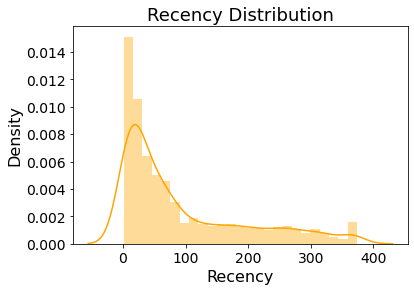

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


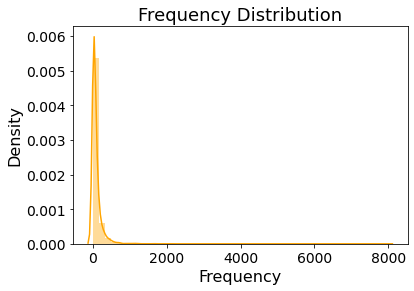

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


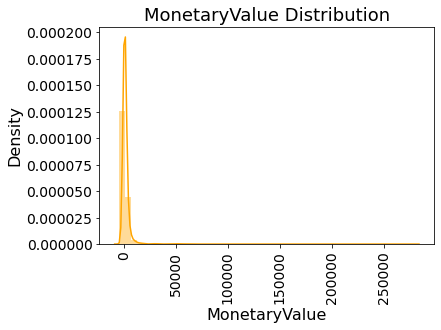

In [156]:
# Recency distribution
sb.distplot(customers['Recency'], 
            color = 'orange')
plt.title('Recency Distribution', 
          fontsize = 18)
plt.xlabel('Recency', 
           fontsize = 16)
plt.ylabel('Density', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Recency_distribution.png')
plt.show()

# Frequency distribution
sb.distplot(customers['Frequency'], 
            color = 'orange')
plt.title('Frequency Distribution', 
          fontsize = 18)
plt.xlabel('Frequency', 
           fontsize = 16)
plt.ylabel('Density', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Frequency_distribution.png')
plt.show()

# MonetaryValue distribution
sb.distplot(customers['MonetaryValue'], 
            color = 'orange')
plt.title('MonetaryValue Distribution', 
          fontsize = 18)
plt.xlabel('MonetaryValue', 
           fontsize = 16)
plt.ylabel('Density', 
           fontsize = 16)
plt.xticks(fontsize = 14, rotation=90)
plt.yticks(fontsize = 14)

plt.savefig('MonetaryValue_distribution.png')
plt.show()

In [157]:
# box-cox transformation to remove skewness
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
4367,8.932980,2.460908,5.652483
4368,7.949051,2.058202,4.323541
4369,2.449000,2.762414,5.610440
4370,1.544575,8.057611,12.795376
4371,5.087438,4.808490,12.247810


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


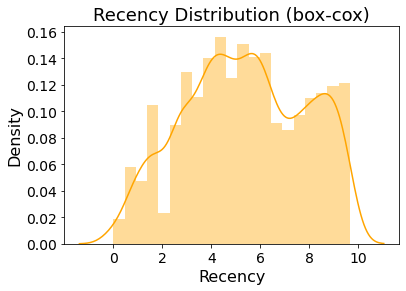

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


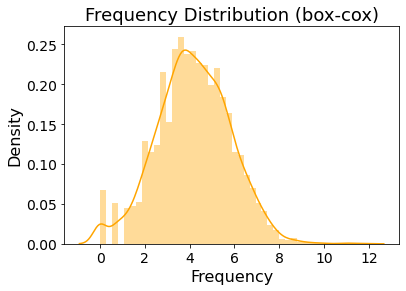

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


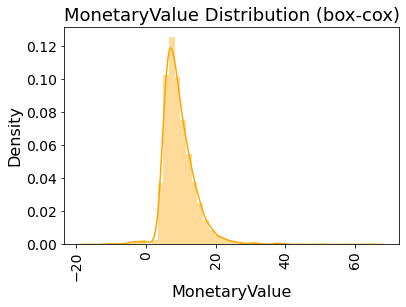

In [159]:
# Recency distribution after box-cox transformation
sb.distplot(customers_fix['Recency'], 
            color = 'orange')
plt.title('Recency Distribution (box-cox)', 
          fontsize = 18)
plt.xlabel('Recency', 
           fontsize = 16)
plt.ylabel('Density', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Recency_distribution.png')
plt.show()

# Frequency distribution after box-cox transformation
sb.distplot(customers_fix['Frequency'], 
            color = 'orange')
plt.title('Frequency Distribution (box-cox)', 
          fontsize = 18)
plt.xlabel('Frequency', 
           fontsize = 16)
plt.ylabel('Density', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Frequency_distribution.png')
plt.show()

# MonetaryValue distribution after box-cox transformation
sb.distplot(customers_fix['MonetaryValue'], 
            color = 'orange')
plt.title('MonetaryValue Distribution (box-cox)', 
          fontsize = 18)
plt.xlabel('MonetaryValue', 
           fontsize = 16)
plt.ylabel('Density', 
           fontsize = 16)
plt.xticks(fontsize = 14, rotation=90)
plt.yticks(fontsize = 14)

plt.savefig('MonetaryValue_distribution.png')
plt.show()

In [163]:
# Import library
from sklearn.preprocessing import StandardScaler# Initialize the Object
scaler = StandardScaler()# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)# Assert that it has mean 0 and variance 1
display(pd.DataFrame(customers_normalized).head())
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

,0,1,2
0,1.606608,-2.098072,-1.925647
1,-1.696240,1.151346,1.330542
2,0.317615,-0.224316,0.507038
3,-0.669146,0.423978,0.488997
4,1.560253,-0.660498,-0.536848


[-0.  0. -0.]
[1. 1. 1.]


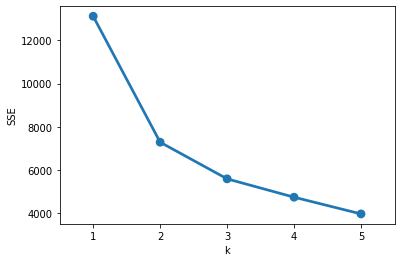

In [167]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [168]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        185.28     19.22        352.11  1659
1         42.91     67.52       1008.26  1934
2         18.48    313.69       7401.71   779

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


cluster 0 is loyal/active customers
cluster 1 is new customers
cluster 2 is churned/old customers


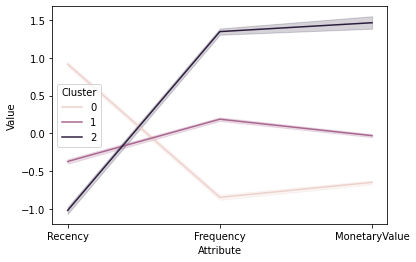

In [172]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()# Visualize it
sb.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
print('cluster 0 is loyal/active customers')
print('cluster 1 is new customers')
print('cluster 2 is churned/old customers')